## Мини-исследование на основе данных из Spotify. "Что делает популярную песню популярной?"

### Источник данных: "Популярность треков в Spotify по жанрам" https://www.kaggle.com/datasets/thedevastator/popularity-of-spotify-top-tracks-by-genre

**Описание данных:**

- `artist` - псевдоним артиста
- `name` - название трека
- `popularity` - место трека в рейтинге популярных песен на Spotify
- `duration_ms` - длительность трека в миллисекундах
- `acousticness` - насколько акустическим является трек (присутствие живых интструментов, живого пространства в треке). От 0 до 1
- `instrumentalness` - инструментальность трека, насколько много инструментов присутствует в треке. От 0 до 1
- `liveness` - насколько "живым" является исполнение трека (полностью искусственная запись или запись живого выступления). От 0 до 1
- `Loudness` - громкость трека (в децибелах)
- `speechiness` - насколько много лирики в тексте. От 0 до 1
- `tempo` - темп песни (beats per minute)
- `positive` - бинарная переменная, отражающая настроение песни. 1 - позитивное, 0 - негавтиное
- `drive` - энергичность песни. 1 - песня способна заставить слушателя танцевать. 0 - не способна

**Вопросы:**
- **Могут ли объективные показатели трека повлиять на его популярность?**
До сих пор не существует единой "формулы" для создания хита. Многие хорошо спродюсированные треки занимают низкие места в чартах, тогда как записанные за один вечер шлягеры быстро становятся популярными. В чём дело? В субъективной харизме артиста, привычках аудитории или в таких объективных показателях трека, как темп, громкость, подбор инструментов? Все эти характеристики есть в наших данных, что поможет нам (не) выявить взаимосвязь между объективными показателями песни и её местом в чартах
- **Какие факторы влияют на популярность песни?**
Считается, что в электронных жанрах музыки, где важен бас, преобладают только определённые тональности, потому что бас в них звучит лучше. Если объективные факторы действительно могут влиять на популярность трека, то какие из них являются значимыми, а какие - нет?
- **Как написать свой хит?**
В конце мы попробуем сами написать свою песню и подставить её в модель, чтобы узнать, станет ли наша песня популярной или нет? :)

**Гипотезы:**
- **Объективные показатели влияют на качество трека.**
Как было сказано выше, есть исследования, которые показывают, что в популярных песнях преобладают определённые тональности. Наши данные должны подтвердить наличие взаимосвязи между объективными показателями трека и его популярностью
- **На популярность трека влияет его энергичность.**
Трек, который заставляет людей двигаться и испытывать яркие эмоции, скорее будет выше в чартах
- **На популярность трека вляиет его длительность.**
Чем дольше трек, тем скучнее будет среднестатистическому пользователю его слушать
- **На популярность трека не влияет его громкость.**
В конце прошлого века в музыкальной индустрии существовала так называемая "война громкостей", когда продюсеры старались выжать из трека максимум громкости, чтобы он больше нравился аудитории. Однако с появлением современных стриминговых сервисов были введены единые стандарты громкости LUFS, которые "выравнивают" субъективную громкость каждого трека. Поэтому изначальная громкость трека никак не будет влиять на его популярность

**Сортировка данных в датафрейме**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st
from statsmodels.formula.api import ols

In [ ]:
df = pd.read_csv('C:/Users/eremisque/Downloads/archive/artist_tracks_data.csv')

In [ ]:
df = df.sort_values('popularity') # сортировка песен от наиболее до наименее популярной
df

,artist,album,track_number,id,name,uri,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
118,Jona,Shockwave,7,6ed1lBLIhu3qh0g4AVfYkU,Back in Time,spotify:track:6ed1lBLIhu3qh0g4AVfYkU,160877,0.01080,0.783,0.824,0.000795,0.0748,-4.558,0.0598,139.998,0.413,0
354,Sarah Geronimo,Just Me,5,3ry8wn6DD5WmQbvjSsEeLH,Silence,spotify:track:3ry8wn6DD5WmQbvjSsEeLH,181600,0.17900,0.823,0.641,0.000015,0.0988,-6.385,0.0417,109.972,0.400,0
119,Jona,Shockwave,8,65K8VVI6U0r1T5fCpooglH,Hitta,spotify:track:65K8VVI6U0r1T5fCpooglH,170807,0.00794,0.746,0.938,0.000016,0.3540,-2.822,0.0658,145.012,0.238,0
357,Sarah Geronimo,Just Me,8,2IHBHNOtlytpsHijHCJN3z,Just Me,spotify:track:2IHBHNOtlytpsHijHCJN3z,220920,0.22000,0.558,0.683,0.000000,0.4390,-6.665,0.2930,134.645,0.691,0
399,Sarah Geronimo,Becoming,13,3lryKhtVc0UHBaCeOO5GC3,Peace Is All We Know,spotify:track:3lryKhtVc0UHBaCeOO5GC3,196306,0.46100,0.698,0.815,0.000000,0.0796,-4.641,0.0308,92.987,0.781,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Jona,Shockwave,8,244AoGCbxOWUhaRzTR7Spz,Hitta (feat. Juicy J),spotify:track:244AoGCbxOWUhaRzTR7Spz,170807,0.01700,0.732,0.956,0.000007,0.3570,-2.775,0.0708,145.103,0.375,59
194,Morissette,Morissette,11,1qoXYfWILyuN0EatImGlma,"Nothing's Gonna Stop Us Now - From ""Crazy Beau...",spotify:track:1qoXYfWILyuN0EatImGlma,258014,0.21600,0.528,0.603,0.000000,0.3040,-5.883,0.0296,185.998,0.482,60
167,Jona,Joytime,10,0Q3SC6kEhxYagDP3bFe5K9,Keep It Mello (feat. Omar LinX),spotify:track:0Q3SC6kEhxYagDP3bFe5K9,243380,0.00134,0.686,0.888,0.000689,0.0736,-3.348,0.0857,142.015,0.108,60
147,Jona,Joytime III,12,35rozLoS6QLE8HX8qswM3k,Rescue Me,spotify:track:35rozLoS6QLE8HX8qswM3k,237203,0.00803,0.433,0.905,0.000000,0.3370,-2.171,0.1010,148.149,0.375,61


- Важно заметить, что мы имеем дело с рейтингом популярности, где самые низкие значения, наоборот, будут самыми популярными

In [ ]:
df = df.drop(columns = ['album', 'track_number', 'id', 'uri'], axis=1) # убрали столбцы, которые не влияют на исследование

In [ ]:
df = df.reindex(columns=['artist', 'name', 'popularity', 'duration_ms', 'acousticness',
                    'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
                    'tempo', 'valence']) # поместили стобец popularity в начало для удобства исследования

In [ ]:
df.isna().sum() # проверяем датасэт на наличие пустых ячеек

artist              0
name                0
popularity          0
duration_ms         0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
dtype: int64

In [ ]:
df # теперь добавим бинарных столбцов и агрегируем несколько столбцов в один

,artist,name,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
118,Jona,Back in Time,0,160877,0.01080,0.783,0.824,0.000795,0.0748,-4.558,0.0598,139.998,0.413
354,Sarah Geronimo,Silence,0,181600,0.17900,0.823,0.641,0.000015,0.0988,-6.385,0.0417,109.972,0.400
119,Jona,Hitta,0,170807,0.00794,0.746,0.938,0.000016,0.3540,-2.822,0.0658,145.012,0.238
357,Sarah Geronimo,Just Me,0,220920,0.22000,0.558,0.683,0.000000,0.4390,-6.665,0.2930,134.645,0.691
399,Sarah Geronimo,Peace Is All We Know,0,196306,0.46100,0.698,0.815,0.000000,0.0796,-4.641,0.0308,92.987,0.781
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Jona,Hitta (feat. Juicy J),59,170807,0.01700,0.732,0.956,0.000007,0.3570,-2.775,0.0708,145.103,0.375
194,Morissette,"Nothing's Gonna Stop Us Now - From ""Crazy Beau...",60,258014,0.21600,0.528,0.603,0.000000,0.3040,-5.883,0.0296,185.998,0.482
167,Jona,Keep It Mello (feat. Omar LinX),60,243380,0.00134,0.686,0.888,0.000689,0.0736,-3.348,0.0857,142.015,0.108
147,Jona,Rescue Me,61,237203,0.00803,0.433,0.905,0.000000,0.3370,-2.171,0.1010,148.149,0.375


In [ ]:
df['valence'].value_counts() # valence - показывает настроение песни
# предположим, что мы категоричны и считаем, что стакан всегда либо наполовину полон, либо наполовину пуст, иного не дано
# сделаем новый бинарный столбец positive, который будет принимать значения 1, если песня позитивная, и 0, если песни негативная
# порог разделения будет 0.5

0.411    10
0.496     7
0.423     6
0.568     6
0.556     6
         ..
0.281     1
0.196     1
0.455     1
0.197     1
0.482     1
Name: valence, Length: 278, dtype: int64

In [ ]:
def mood_binary(x):
    if x >= 0.5:
        return 1
    else:
        return 0

In [ ]:
df['positive'] = df['valence'].apply(mood_binary)
df['positive'].value_counts() # лишних значений нет, всё хорошо работает

0    342
1     94
Name: positive, dtype: int64

In [ ]:
df = df.drop(['valence'], axis=1)
df # удаляем valence за ненадобностью

,artist,name,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,positive
118,Jona,Back in Time,0,160877,0.01080,0.783,0.824,0.000795,0.0748,-4.558,0.0598,139.998,0
354,Sarah Geronimo,Silence,0,181600,0.17900,0.823,0.641,0.000015,0.0988,-6.385,0.0417,109.972,0
119,Jona,Hitta,0,170807,0.00794,0.746,0.938,0.000016,0.3540,-2.822,0.0658,145.012,0
357,Sarah Geronimo,Just Me,0,220920,0.22000,0.558,0.683,0.000000,0.4390,-6.665,0.2930,134.645,1
399,Sarah Geronimo,Peace Is All We Know,0,196306,0.46100,0.698,0.815,0.000000,0.0796,-4.641,0.0308,92.987,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Jona,Hitta (feat. Juicy J),59,170807,0.01700,0.732,0.956,0.000007,0.3570,-2.775,0.0708,145.103,0
194,Morissette,"Nothing's Gonna Stop Us Now - From ""Crazy Beau...",60,258014,0.21600,0.528,0.603,0.000000,0.3040,-5.883,0.0296,185.998,0
167,Jona,Keep It Mello (feat. Omar LinX),60,243380,0.00134,0.686,0.888,0.000689,0.0736,-3.348,0.0857,142.015,0
147,Jona,Rescue Me,61,237203,0.00803,0.433,0.905,0.000000,0.3370,-2.171,0.1010,148.149,0


In [ ]:
# кажется, что показатели danceability и energy - очень похожи. они влияют на общий эмоциональный эффект от прослушивания песни
# ведь не важно какого жанра песня - если она достаточно энергичная, то вам скорее всего захочется танцевать
# поэтому я считаю оправданным создать ещё один бинарный столбец drive, который бы показывал, является ли песня энергичной

In [ ]:
df['danceability'].value_counts()

0.622    13
0.577     7
0.783     6
0.514     6
0.726     6
         ..
0.513     1
0.448     1
0.426     1
0.383     1
0.598     1
Name: danceability, Length: 250, dtype: int64

In [ ]:
df.sort_values('danceability') # как мы видим, есть значения и danceability и energy ниже порога 0.5, поэтому можно смело установить границу по нему

,artist,name,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,positive
258,Sarah Geronimo,Kailan,7,302613,0.910000,0.160,0.294,0.025000,0.2600,-11.926,0.0332,77.610,0
262,Sarah Geronimo,Hanggang Sa Dulo Ng Walang Hanggan,6,236533,0.886000,0.164,0.285,0.000742,0.0637,-9.372,0.0342,78.761,0
315,Sarah Geronimo,"Ngayon, Bukas At Kailanman - Theme Song From ""...",18,266573,0.897000,0.178,0.322,0.000015,0.0960,-6.852,0.0318,75.464,0
57,Angeline Quinto,Mahiwaga,23,181423,0.953000,0.201,0.208,0.000973,0.1210,-12.831,0.0413,77.982,0
199,Morissette,Kapag Ako Ay Nagmahal - Minus One,25,313812,0.136000,0.215,0.242,0.772000,0.1560,-11.694,0.0303,145.302,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Jona,Bad Bitches,24,152414,0.000330,0.819,0.814,0.328000,0.0644,-3.440,0.0382,125.965,0
354,Sarah Geronimo,Silence,0,181600,0.179000,0.823,0.641,0.000015,0.0988,-6.385,0.0417,109.972,0
424,Sarah Geronimo,Silence,5,181613,0.183000,0.829,0.637,0.000017,0.1010,-6.384,0.0408,109.981,0
338,Sarah Geronimo,Silence,0,181613,0.183000,0.829,0.637,0.000017,0.1010,-6.384,0.0408,109.981,0


In [ ]:
drive_1 = df[(df["danceability"] >= 0.5) & (df["energy"] >= 0.5)]

In [ ]:
drive_1['drive'] = 1
drive_1

C:\Users\EREMIS~1\AppData\Local\Temp/ipykernel_18388/3933391718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drive_1['drive'] = 1


,artist,name,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,positive,drive
118,Jona,Back in Time,0,160877,0.01080,0.783,0.824,0.000795,0.0748,-4.558,0.0598,139.998,0,1
354,Sarah Geronimo,Silence,0,181600,0.17900,0.823,0.641,0.000015,0.0988,-6.385,0.0417,109.972,0,1
119,Jona,Hitta,0,170807,0.00794,0.746,0.938,0.000016,0.3540,-2.822,0.0658,145.012,0,1
357,Sarah Geronimo,Just Me,0,220920,0.22000,0.558,0.683,0.000000,0.4390,-6.665,0.2930,134.645,1,1
399,Sarah Geronimo,Peace Is All We Know,0,196306,0.46100,0.698,0.815,0.000000,0.0796,-4.641,0.0308,92.987,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Jona,Summer,58,233239,0.00695,0.583,0.748,0.024100,0.2200,-4.798,0.0292,142.029,0,1
71,Jona,Hitta (feat. Juicy J),59,170807,0.01700,0.732,0.956,0.000007,0.3570,-2.775,0.0708,145.103,0,1
194,Morissette,"Nothing's Gonna Stop Us Now - From ""Crazy Beau...",60,258014,0.21600,0.528,0.603,0.000000,0.3040,-5.883,0.0296,185.998,0,1
167,Jona,Keep It Mello (feat. Omar LinX),60,243380,0.00134,0.686,0.888,0.000689,0.0736,-3.348,0.0857,142.015,0,1


In [ ]:
drive_2 = df[(df["danceability"] < 0.5) & (df["energy"] < 0.5)]

In [ ]:
drive_2['drive'] = 0

C:\Users\EREMIS~1\AppData\Local\Temp/ipykernel_18388/3937143384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drive_2['drive'] = 0


In [ ]:
drive_2

,artist,name,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,positive,drive
337,Sarah Geronimo,Where Only Angels Fly,0,239880,0.0563,0.466,0.473,0.000000,0.0898,-6.997,0.0281,127.847,0,0
353,Sarah Geronimo,Where Only Angels Fly,1,239866,0.0544,0.470,0.471,0.000000,0.1000,-6.980,0.0283,127.898,0,0
61,Angeline Quinto,Wag Mo Akong Iwan Mag Isa - Minus One,4,270135,0.3820,0.358,0.121,0.262000,0.1500,-14.927,0.0316,135.657,0,0
43,Angeline Quinto,Babalikang Muli - Minus One,5,242146,0.7480,0.444,0.208,0.718000,0.1400,-11.226,0.0269,70.001,0,0
262,Sarah Geronimo,Hanggang Sa Dulo Ng Walang Hanggan,6,236533,0.8860,0.164,0.285,0.000742,0.0637,-9.372,0.0342,78.761,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,Angeline Quinto,Gusto Kita,46,288000,0.5940,0.461,0.474,0.000000,0.0976,-7.479,0.0347,71.760,0,0
254,Sarah Geronimo,It Takes a Man and a Woman,48,229306,0.6880,0.452,0.465,0.000000,0.1220,-8.314,0.0484,88.585,0,0
54,Angeline Quinto,Kunin Mo Na Ang Lahat Sa Akin,49,278755,0.9420,0.394,0.238,0.000160,0.0921,-9.817,0.0375,128.322,0,0
270,Sarah Geronimo,Forever'S Not Enough,52,267733,0.7310,0.422,0.378,0.000000,0.1640,-7.328,0.0276,142.651,0,0


In [ ]:
df = drive_1.append(drive_2)

In [ ]:
df = df.sort_values('popularity') # на всякий случай снова отсортируем датафрейм по популярности

In [ ]:
df

,artist,name,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,positive,drive
118,Jona,Back in Time,0,160877,0.01080,0.783,0.824,0.000795,0.0748,-4.558,0.0598,139.998,0,1
337,Sarah Geronimo,Where Only Angels Fly,0,239880,0.05630,0.466,0.473,0.000000,0.0898,-6.997,0.0281,127.847,0,0
335,Sarah Geronimo,You'Re the Love Of My Life,0,235226,0.45800,0.503,0.515,0.000000,0.1940,-6.088,0.0282,127.920,0,1
347,Sarah Geronimo,What Have You Done to My Heart,0,229733,0.13000,0.596,0.659,0.000000,0.1580,-6.693,0.0282,101.782,0,1
346,Sarah Geronimo,I Am Falling,0,249453,0.26600,0.594,0.669,0.000000,0.0727,-5.704,0.0279,132.003,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Jona,Summer,58,233239,0.00695,0.583,0.748,0.024100,0.2200,-4.798,0.0292,142.029,0,1
71,Jona,Hitta (feat. Juicy J),59,170807,0.01700,0.732,0.956,0.000007,0.3570,-2.775,0.0708,145.103,0,1
194,Morissette,"Nothing's Gonna Stop Us Now - From ""Crazy Beau...",60,258014,0.21600,0.528,0.603,0.000000,0.3040,-5.883,0.0296,185.998,0,1
167,Jona,Keep It Mello (feat. Omar LinX),60,243380,0.00134,0.686,0.888,0.000689,0.0736,-3.348,0.0857,142.015,0,1


In [ ]:
df['drive'].value_counts() # всё работает, нет лишних значений

1    219
0     96
Name: drive, dtype: int64

In [ ]:
df = df.drop(columns = ['danceability', 'energy'], axis=1) # удаляем ненужные столбцы

**Описание данных**

In [ ]:
df.describe()

,popularity,duration_ms,acousticness,instrumentalness,liveness,loudness,speechiness,tempo,positive,drive
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,20.073016,222032.225397,0.326408,0.123995,0.185960,-6.139232,0.049061,125.520067,0.279365,0.695238
std,16.646313,44869.239468,0.343335,0.270918,0.132181,2.883590,0.037142,26.463144,0.449401,0.461039
min,0.000000,63120.000000,0.000038,0.000000,0.040700,-15.667000,0.025100,66.268000,0.000000,0.000000
25%,6.000000,182074.000000,0.010800,0.000000,0.093550,-7.987000,0.029700,108.372000,0.000000,0.000000
50%,17.000000,225893.000000,0.177000,0.000007,0.134000,-5.683000,0.034800,129.900000,0.000000,1.000000
75%,32.000000,249836.000000,0.648000,0.005690,0.248000,-3.726000,0.049750,142.159000,1.000000,1.000000
max,69.000000,351693.000000,0.962000,0.971000,0.823000,-0.958000,0.293000,188.031000,1.000000,1.000000


Получаются следующие данные по каждому столбцу:

**Длительность**
- В среднем, популярные песни на Spotify длятся 222032.225 миллисекунд или 3.7 минуты
- Максимальная длительность песни из списка популярных 351693 миллисекунд или 5.9 минут, что достаточно много для поп-песен, но не так много для песен в других жанрах

**Акуситика**
- В среднем, популярные песни "акустичны" на 0.33, что может говорить об уклоне современных артистов и их продюсеров в сторону электронной музыки

**Инструментальность**
- В среднем, популярные песни "инструментальны" на 0.12, что может говорить о "минималистичном" характере песен - чем проще аранжировка, тем лучше слушается

**Живость**
- В среднем, в популярных песнях присутствует живое исполнение на 0.185, что может говорить о стремлении современных артистов и их продюсеров к "искусственному", электронному звучанию

**Громкость**
- В среднем, мастер-трек популярных песен звучит на громкости -6.14 децибел, что соответствует современным музыкальным стандартам
- Максимальная громкость популярного трека -0.96, что очень близко к экстремальным значениям, превышающим 0 децибел

**Лиричность**
- Среднее значение 0.05, максимальное - всего 0.29. Это может говорить о низком значении текстов для популярной музыки

**Темп**
- Среднее значение темпа - 125.52
- Максимальное - 188
- Все эти значения соответствуют стандартам танцевальной музыки

**Позитивность трека**
- Среднее значение - 0.28. В современной популярной музыке очень много грусти

**Энергичность (drive)**
- Среднее значение - 0.695, что может говорить о том, что популярная музыка так или иначе заставляет танцевать слушателя

**Графики распределения показателей**

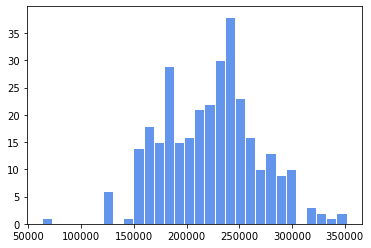

In [ ]:
plt.hist(df['duration_ms'], color = "cornflowerblue", edgecolor = "white", bins = 30);

- Распределение длительности в целом ближе к нормальному, однако есть небольшая скошенность влево, что может объясняться тяготением популярной музыки к краткости, чтобы не наскучить слушателю

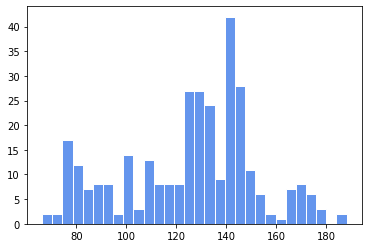

In [ ]:
plt.hist(df['tempo'], color = "cornflowerblue", edgecolor = "white", bins = 30);

- Распределение темпа тоже скошено влево

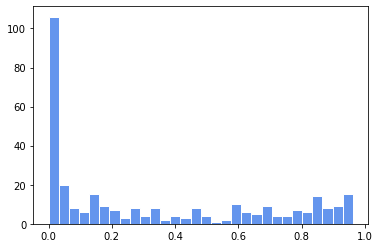

In [ ]:
plt.hist(df['acousticness'], color = "cornflowerblue", edgecolor = "white", bins = 30);

- В распределении акустики преобладают низкие показатели. Совпадает с интерпретацией в прошлом пункте

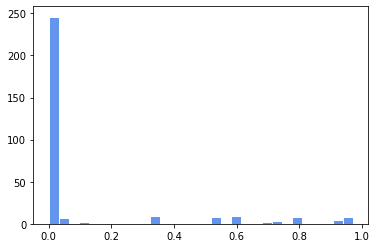

In [ ]:
plt.hist(df['instrumentalness'], color = "cornflowerblue", edgecolor = "white", bins = 30);

- В распределении инструментальности тоже преобладают низкие значения.

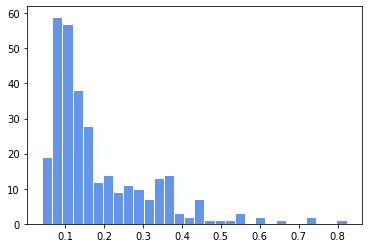

In [ ]:
plt.hist(df['liveness'], color = "cornflowerblue", edgecolor = "white", bins = 30);

- В показателях живого исполнения тоже преобладают низкие значения. Совпадает с интерпретацией выше

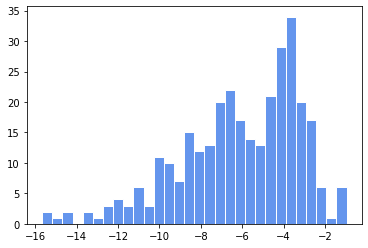

In [ ]:
plt.hist(df['loudness'], color = "cornflowerblue", edgecolor = "white", bins = 30);

- Распределение скошено влево. Мода всё-таки приходится на высокие показатели громкости (примерно -3 децибел), однако большинство песен лежит в интервале от -12 до -3 децибел

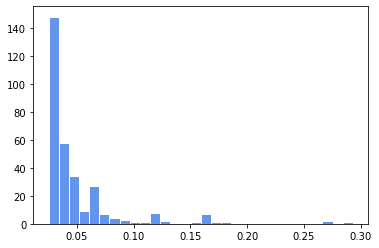

In [ ]:
plt.hist(df['speechiness'], color = "cornflowerblue", edgecolor = "white", bins = 30);

- Почти все значения близятся к нулю. Совпадает с интерпретацией выше

**Проверка гипотез: сравнение двух средних**

In [ ]:
df.groupby('positive').mean() # вычисляем, насколько в среднем будет популярна песня, если она позитивная или грустная
# или иначе: какое место в топе в среднем займёт позитивная или негативная песня

,popularity,duration_ms,acousticness,instrumentalness,liveness,loudness,speechiness,tempo,drive
positive,,,,,,,,,
0,20.784141,229506.185022,0.402900,0.100456,0.164567,-6.696273,0.042208,125.409123,0.577093
1,18.238636,202752.806818,0.129094,0.184714,0.241144,-4.702318,0.066739,125.806250,1.000000


In [ ]:
song_pos = df[df['positive'] == 1]
song_neg = df[df['positive'] == 0]

In [ ]:
st.ttest_ind(song_pos["popularity"], song_neg["popularity"])

Ttest_indResult(statistic=-1.2186811135427247, pvalue=0.22388296306128105)

При уровне доверия 95% у нас нет оснований отвергнуть гипотезу о равенстве средних двух групп. Поэтому средняя популярность позитивных и негативных песен будет равной. Ура! Можно сочинять весёлую музыку

**Проверка гипотез: что влияет на популярность**

In [ ]:
df[['duration_ms', 'drive']].corr()

,duration_ms,drive
duration_ms,1.000000,-0.516113
drive,-0.516113,1.000000


In [ ]:
st.pearsonr(df['duration_ms'], df['drive'])

(-0.5161129338691445, 7.660980393822371e-23)

- P-value практически равно нулю, следовательно, показатели связаны. Чем более энергичная песня, тем менее продолжительной она будет при прочих равных

In [ ]:
st.spearmanr(df["popularity"], df["duration_ms"]) # теперь стоит посмотреть, если ли связь между длительностью песни и её популярностью

SpearmanrResult(correlation=0.08418001918366794, pvalue=0.13602591641262402)

- Здесь p-value придётся отвергнуть при любом уровне доверия (90-95%). Поэтому можно считать, что между покаказателями нет связи

**Множественная регрессия: влияние объективных показателей трека на его популярность**

- Сначала построим модель множественной регрессии, чтобы узнать, влияют ли наши показатели на популярность. И если влияют, то с какой силой?

In [ ]:
df

,artist,name,popularity,duration_ms,acousticness,instrumentalness,liveness,loudness,speechiness,tempo,positive,drive
118,Jona,Back in Time,0,160877,0.01080,0.000795,0.0748,-4.558,0.0598,139.998,0,1
337,Sarah Geronimo,Where Only Angels Fly,0,239880,0.05630,0.000000,0.0898,-6.997,0.0281,127.847,0,0
335,Sarah Geronimo,You'Re the Love Of My Life,0,235226,0.45800,0.000000,0.1940,-6.088,0.0282,127.920,0,1
347,Sarah Geronimo,What Have You Done to My Heart,0,229733,0.13000,0.000000,0.1580,-6.693,0.0282,101.782,0,1
346,Sarah Geronimo,I Am Falling,0,249453,0.26600,0.000000,0.0727,-5.704,0.0279,132.003,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
159,Jona,Summer,58,233239,0.00695,0.024100,0.2200,-4.798,0.0292,142.029,0,1
71,Jona,Hitta (feat. Juicy J),59,170807,0.01700,0.000007,0.3570,-2.775,0.0708,145.103,0,1
194,Morissette,"Nothing's Gonna Stop Us Now - From ""Crazy Beau...",60,258014,0.21600,0.000000,0.3040,-5.883,0.0296,185.998,0,1
167,Jona,Keep It Mello (feat. Omar LinX),60,243380,0.00134,0.000689,0.0736,-3.348,0.0857,142.015,0,1


In [ ]:
model = ols("popularity ~ duration_ms + acousticness + instrumentalness + liveness + loudness + speechiness + tempo + positive + drive", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.973
Date:                Wed, 26 Oct 2022   Prob (F-statistic):            0.00209
Time:                        16:39:49   Log-Likelihood:                -1319.1
No. Observations:                 315   AIC:                             2658.
Df Residuals:                     305   BIC:                             2696.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           11.4746      9.645  

**Графики для статистически значимых переменных (Уровень доверия 90%)**

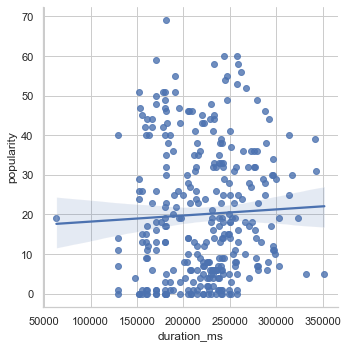

In [ ]:
sns.lmplot(data = df, x = "duration_ms", y = "popularity");

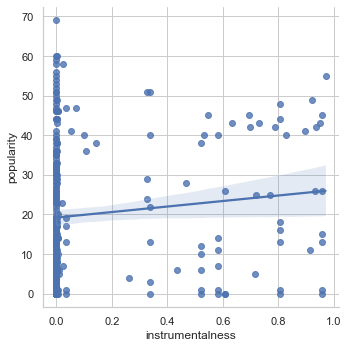

In [ ]:
sns.lmplot(data = df, x = "instrumentalness", y = "popularity");

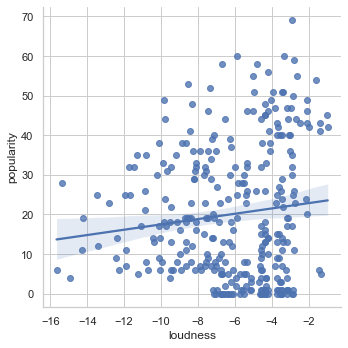

In [ ]:
sns.lmplot(data = df, x = "loudness", y = "popularity");

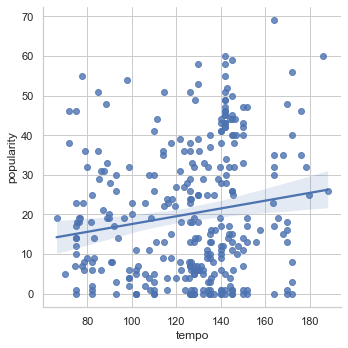

In [ ]:
sns.lmplot(data = df, x = "tempo", y = "popularity");

- У модели достаточно низкий R-squared. Дело в том, что в модели очень много независимых переменных, поэтому такой большой разброс данных. Попробуем построить новую модель, но уже только с теми переменными, у которых есть статистическая значимость

In [ ]:
model1 = ols("popularity ~ duration_ms + instrumentalness + loudness + tempo", df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     4.494
Date:                Wed, 26 Oct 2022   Prob (F-statistic):            0.00152
Time:                        16:40:17   Log-Likelihood:                -1323.4
No. Observations:                 315   AIC:                             2657.
Df Residuals:                     310   BIC:                             2676.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3600      7.305  

- Попробуем вернуть переменную drive, так как она может влиять на длительность трека, то есть duration_ms

In [ ]:
model2 = ols("popularity ~ duration_ms + instrumentalness + loudness + tempo + drive + duration_ms:drive", df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     4.106
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           0.000556
Time:                        16:40:25   Log-Likelihood:                -1320.2
No. Observations:                 315   AIC:                             2654.
Df Residuals:                     308   BIC:                             2681.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            15.5190     13.84

- Ни у переменной drive, ни у duration_ms * drive нет статистической значимости, поэтому мы должны признать, что они не влияют на позиции трека в чарте

In [ ]:
print(model1.summary()) # выведем ещё раз нашу модель со статистически значимыми переменными

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     4.494
Date:                Wed, 26 Oct 2022   Prob (F-statistic):            0.00152
Time:                        16:40:44   Log-Likelihood:                -1323.4
No. Observations:                 315   AIC:                             2657.
Df Residuals:                     310   BIC:                             2676.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3600      7.305  

$$\hat{popularity}_i = 0.36 + 6.429e-05 * duration-ms_i + 6.0546 * instrumentalness_i + 0.8404 * loudness_i + 0.0784 * tempo_i$$
- При уровне доверия 90% все показатели являются статистически значимыми
- При прочих равных условиях, при увеличении длительности нашей песни на 1 миллисекунду, в среднем, веротяность попасть в топ будет уменьшаться на 6.429e-05 (не стоит забывать, что 0 - это высокое положение в рейтинге, 69 - самое низкое; поэтому корреляция получается отрицательной)
- При прочих равных условиях, при увеличении показателя instrumentalness на 0.1, в среднем, вероятность попасть в топ чарта будет уменьшаться на 6.0546
- При прочих равных условиях, при увеличении показателя loudness на 1 децибел, в среднем, вероятность попасть в топ чарта будет уменьшаться на 0.8404
- При прочих равных условиях, при увеличении темпа на одну единицу, в среднем, вероятность попасть в топ чарта будет ниже на 0.0784

In [ ]:
(df['popularity'] == model1.predict(df)).value_counts() # модель не предсказывает верно ни одного варианта

False    315
dtype: int64

In [ ]:
df['popularity']

118     0
337     0
335     0
347     0
346     0
       ..
159    58
71     59
194    60
167    60
75     69
Name: popularity, Length: 315, dtype: int64

In [ ]:
model1.predict(df) # как видно, даже приблизительно не похоже на реальные варианты

118    17.859948
337    19.931409
335    20.401878
347    17.489770
346    21.959608
         ...    
159    22.611040
71     20.392593
194    26.595393
167    24.338835
75     22.446720
Length: 315, dtype: float64

In [ ]:
def popular_binary(x):
    if x <= 34:
        return 1
    else:
        return 0

In [ ]:
df['pop'] = df['popularity'].apply(popular_binary)

In [ ]:
df['predict'] = model1.predict(df)

In [ ]:
df['predict_pop'] = df['predict'].apply(popular_binary)

In [ ]:
(df['pop'] == df['predict_pop']).value_counts() # если сильно огрубить результаты и разделить данные на популярные (1) и непопулярные (0)
# по 50% рейтинга (69 // 2), то тогда модель предскажет верные значения в большей части случаев

True     243
False     72
dtype: int64

**Можем ли мы написать хит?**

- Попробуем написать свою песню. Предположим, что мы сели за пианино, придумали быстро текст, аккомпанемент на инструменте и всё записали. Наши показатели получаются такими:
- `duration_ms` = 150000 (2.5 минуты)
- `instrumentalness` = 0.15 (У нас всего два инструмента: голос и пианино. Будем считать, что голос полноценным инструментом не является, поэтому + 0.5)
- `loudness` = -6 децибел (пишем музыку по стандартам)
- `tempo` = 120 bpm (обычный темп для популярной музыки)
- Тогда мы займём следующее место в топ-чарте Spotify:

In [ ]:
x = model1.predict(exog = {"duration_ms" : 150000, 'instrumentalness' : 0.15, 'loudness' : -6, 'tempo' : 120})
x

0    15.283279
dtype: float64

In [ ]:
x.apply(popular_binary) # ура, мы были попали в категорию популярных песен!

0    1
dtype: int64

### Итоги исследования

**Вопросы:**
- **Могут ли объективные показатели трека влиять на его популярность?**
Выходит, что могут, но с очень маленькими веротяностями и большим разбросом значений
- **Какие объективные показатели влияют на популярность трека?**
На популярность трека влияют: длительность, инструментальность, громкость, темп
- **Можем ли мы написать хит?**
Выходит, что можем! Осталось его только записать

**Гипотезы:**
- **Объективные показатели влияют на качество трека.**
Да, действительно влияют
- **На популярность трека влияет его энергичность.**
Оказывается, не влияет
- **На популярность трека влияет его длительность.**
Да, действительно влияет
- **На популярность трека не влияет громкость.**
Оказывается, что влияет!

**Странности:**

- Модель очень плохо предсказывает значения. Это может говорить либо о том, что в индустрии популярной музыки на популярность трека влияют не только его объективные характеристики, но также и харизма артиста, пиар-стратегии его менджеров, либо о том, что наших данных недостаточно для точных выводов - при увеличении количества наблюдений, вероятность ошибиться может стать меньше
- Такие явные показатели, как настроение и энергичность песни, не влияют на её популярность. Возможно, это связано с тем, что в большинстве случаев популярные исполнители и так стремятся к тому, чтобы сделать песню энергичной. А слушатель при этом готов слушать любую по настроению песню
- Громкость влияет на популярность песни - чем менее экстремальны значения громкости, тем популярнее будет трек